In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
x = np.array(df.iloc[:,1]).reshape(-1,1)
y = np.array(df.iloc[:,-1]).reshape(-1,1)

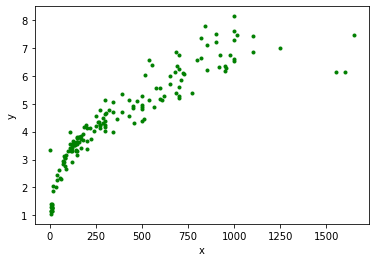

In [4]:
plt.plot(x,y,'g.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
#train test split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2, random_state=2)

In [6]:
#Applying LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.7080892966469283

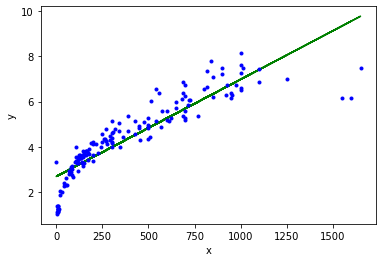

In [8]:
plt.plot(x_train,lr.predict(x_train),color='g')
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
#Applying Polynomial Regression with degree 2
poly = PolynomialFeatures(degree=2, include_bias = True) #include bias
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
print(x_train[0])
print(x_test_trans[0])

[820.]
[1.0e+00 5.0e+02 2.5e+05]


In [10]:
poly = PolynomialFeatures(degree=2, include_bias = False) #notinclude bias
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
print(x_train[0])
print(x_test_trans[0])

[820.]
[   500. 250000.]


In [11]:
lr = LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [13]:
y_pred =lr.predict(x_test_trans)
r2_score(y_test,y_pred)

0.8652739621370583